# Adult Census dataset

In [1]:
#Učitavanje datoteke
import pandas as pd
df = pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


/tmp/ipython-input-2-991137349.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='income', data=df, palette='Set2')


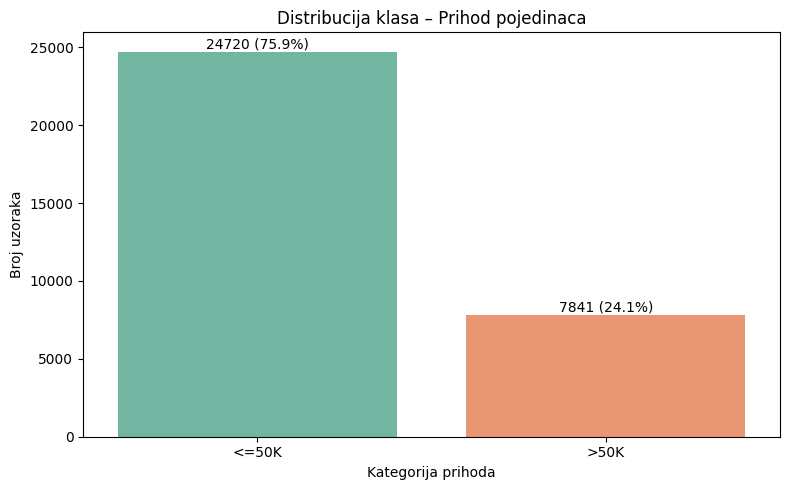

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='income', data=df, palette='Set2')
plt.title('Distribucija klasa – Prihod pojedinaca')
plt.xlabel('Kategorija prihoda')
plt.ylabel('Broj uzoraka')

# Dodavanje broja i procenta iznad svakog stubca
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    ax.annotate(f'{count} ({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

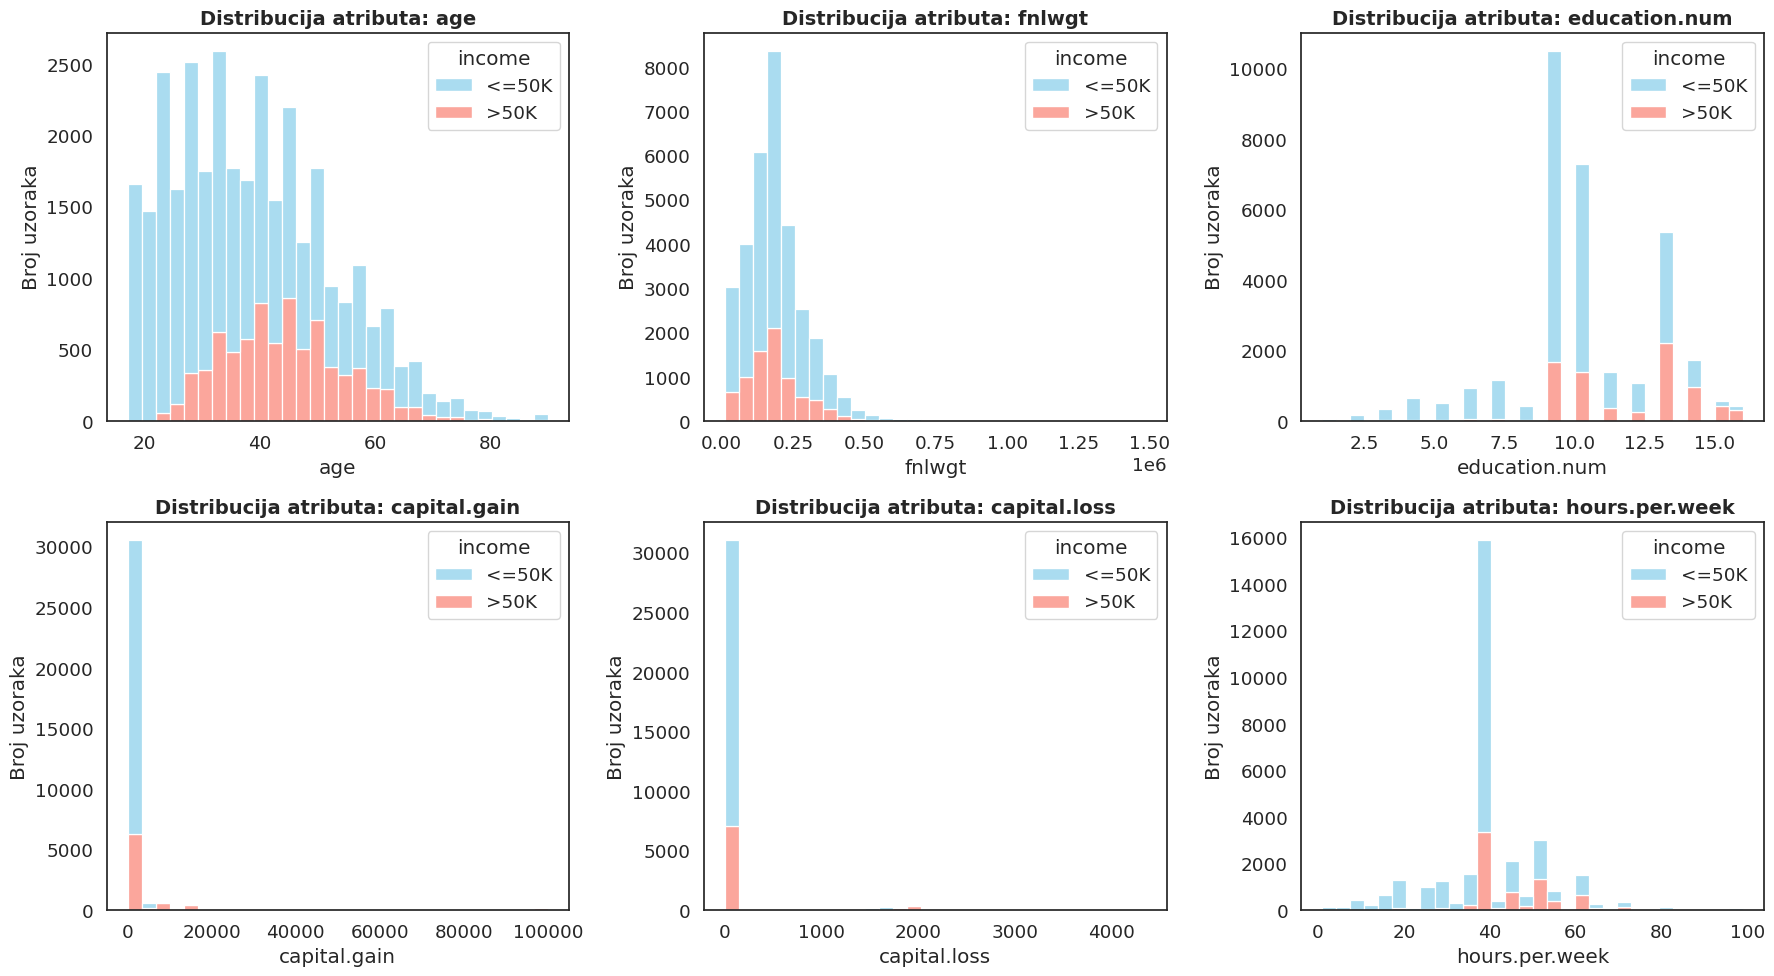

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atributi koje želimo prikazati
attributes = [
    'age',
    'fnlwgt',
    'education.num',
    'capital.gain',
    'capital.loss',
    'hours.per.week'
]

# Postavke dizajna
sns.set(style="white", font_scale=1.2)
plt.figure(figsize=(18, 10))

# Boje za binarnu klasifikaciju
custom_palette = {'<=50K': 'skyblue', '>50K': 'salmon'}

for i, attr in enumerate(attributes, 1):
    plt.subplot(2, 3, i)
    sns.histplot(
        data=df, x=attr, hue='income',
        bins=30, stat='count', common_norm=False,
        palette=custom_palette, alpha=0.7,
        multiple='stack'
    )
    plt.title(f'Distribucija atributa: {attr}', fontsize=14, weight='bold')
    plt.xlabel(attr)
    plt.ylabel('Broj uzoraka')
    plt.grid(False)

plt.tight_layout()
plt.show()


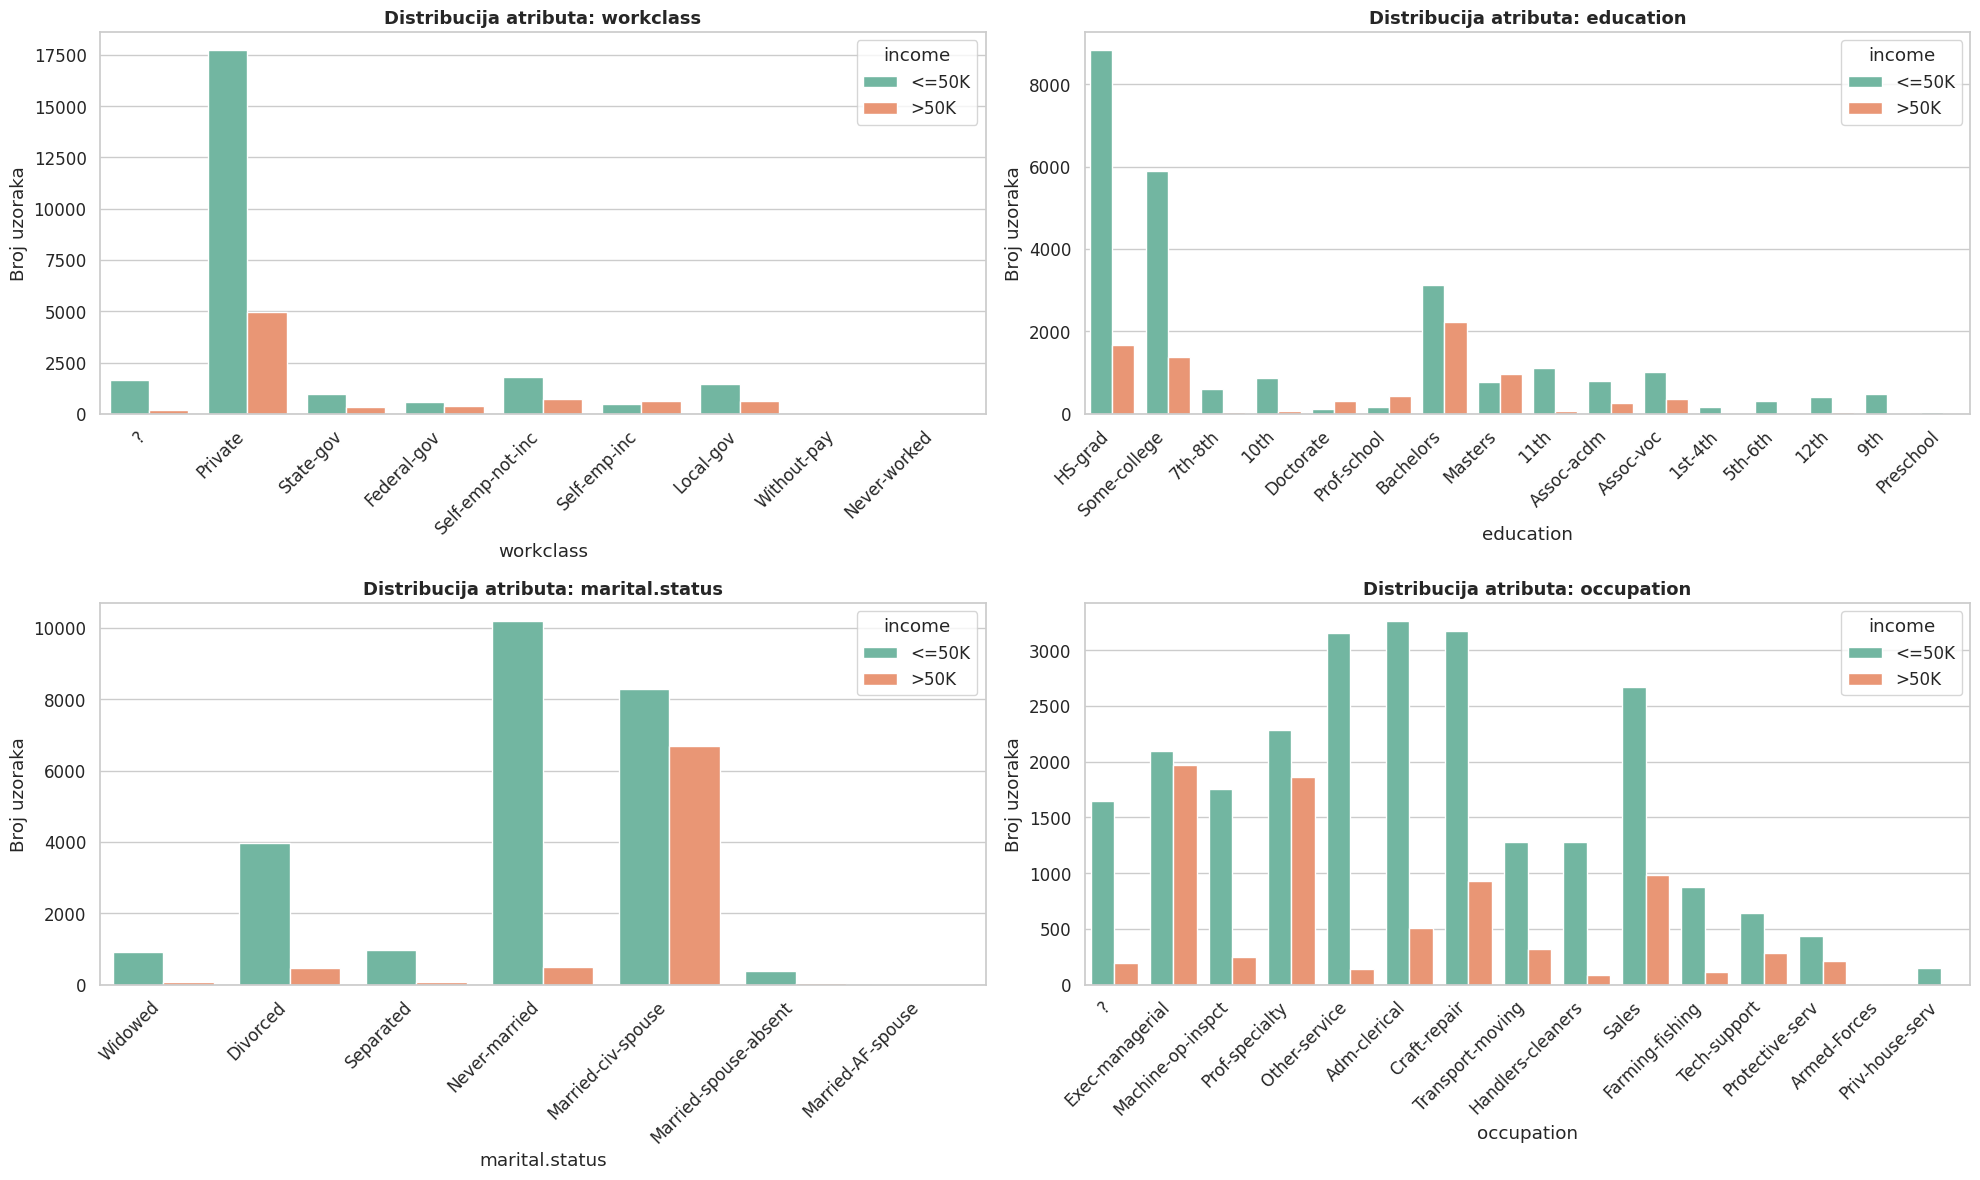

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prva grupa kategorijskih kolona
group_1 = ['workclass', 'education', 'marital.status', 'occupation']

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(20, 12))

for i, attr in enumerate(group_1, 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(data=df, x=attr, hue='income', palette='Set2')
    plt.title(f'Distribucija atributa: {attr}', fontsize=13, weight='bold')
    plt.xlabel(attr)
    plt.ylabel('Broj uzoraka')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()


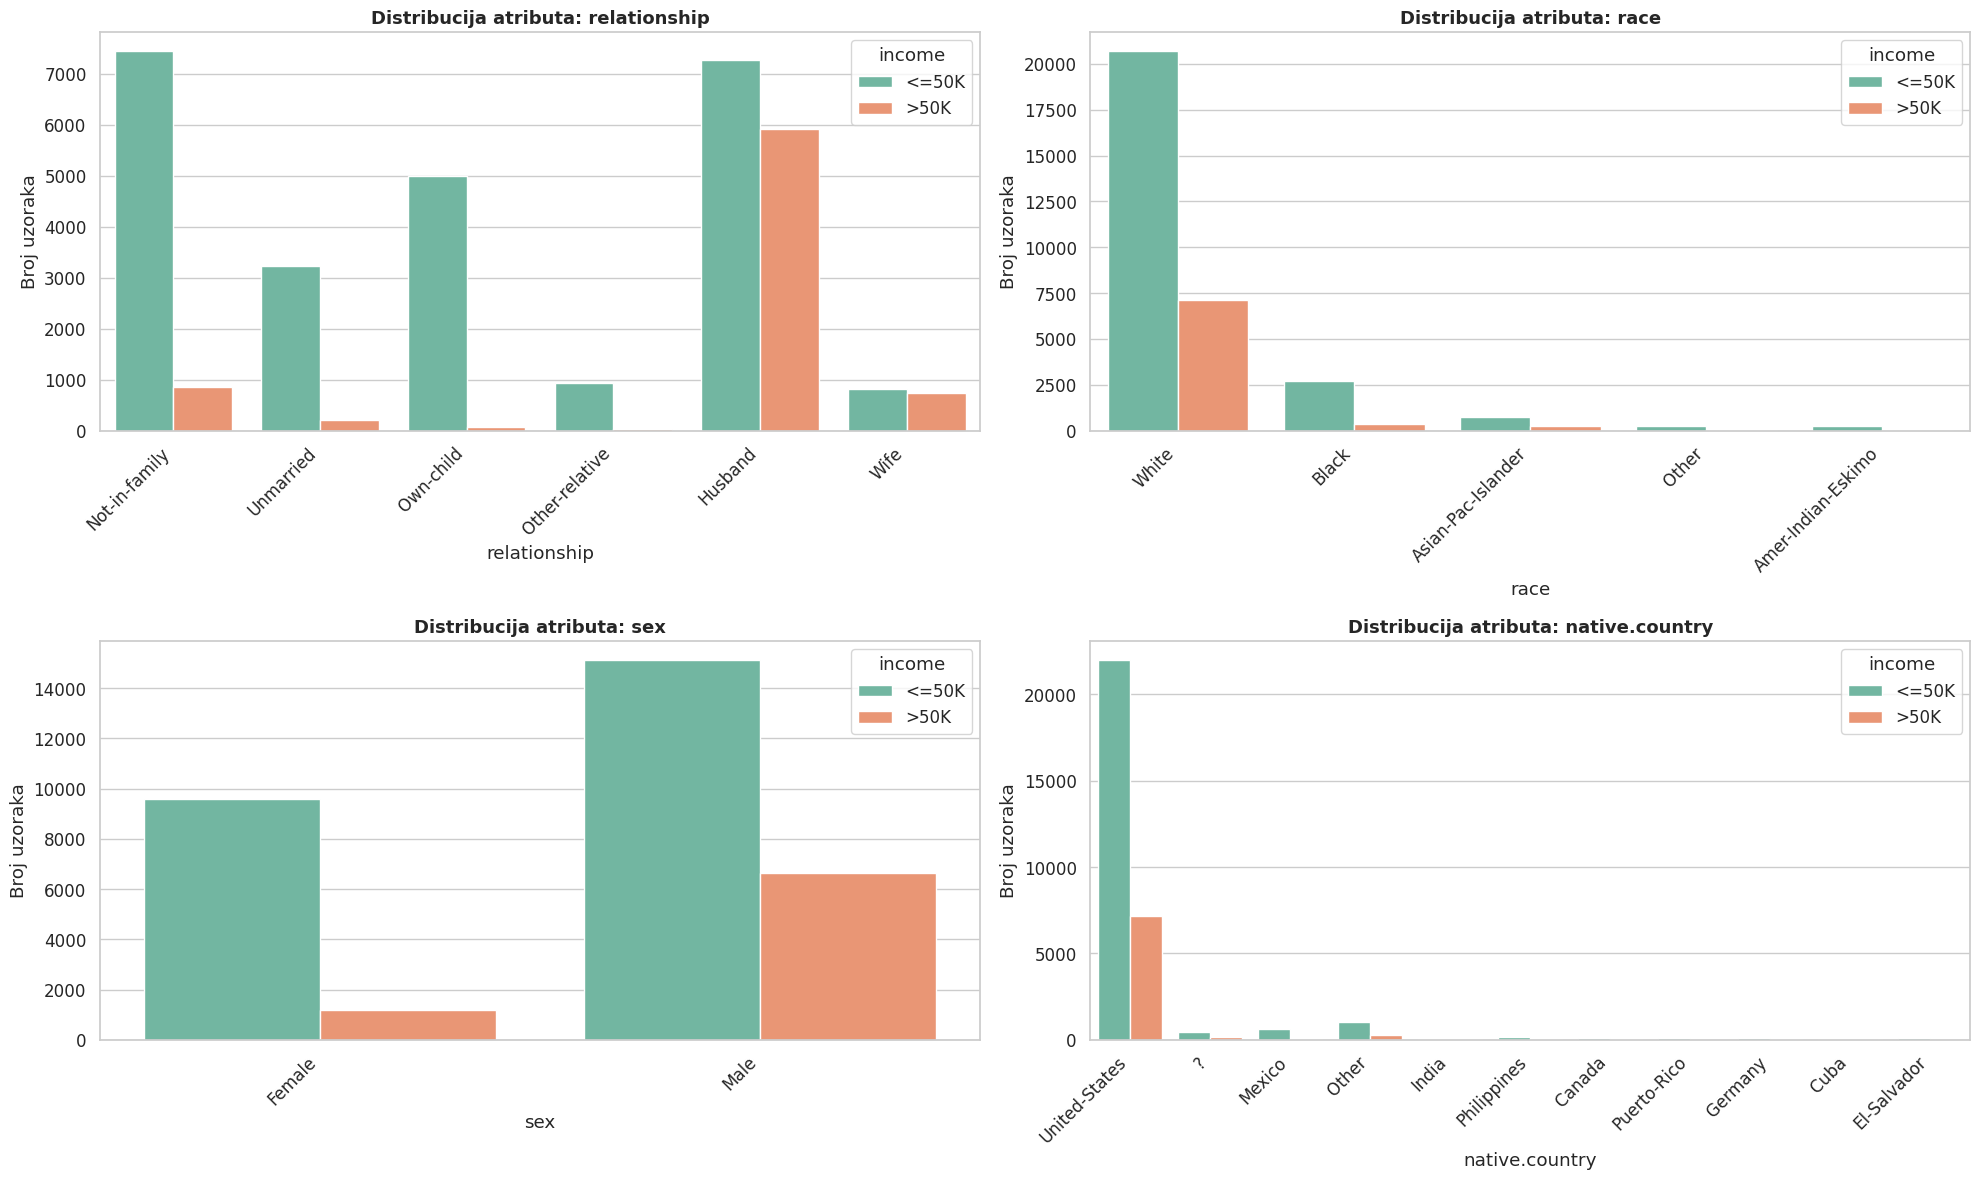

In [5]:
#Grupisanje vrijednosti native-country zbog velikog broja mogućih vrijednosti
top_countries = df['native.country'].value_counts().nlargest(10).index
df['native.country'] = df['native.country'].apply(lambda x: x if x in top_countries else 'Other')
# Druga grupa kategorijskih kolona
group_2 = ['relationship', 'race', 'sex', 'native.country']

plt.figure(figsize=(20, 12))

for i, attr in enumerate(group_2, 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(data=df, x=attr, hue='income', palette='Set2')
    plt.title(f'Distribucija atributa: {attr}', fontsize=13, weight='bold')
    plt.xlabel(attr)
    plt.ylabel('Broj uzoraka')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()